# Importing Libraries

In [1]:
#import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

# Importing Dataframe

In [2]:
# Setting Variables
path = r'C:\Users\Saikat Halder\Documents\CareerFoundry\Data Immersion\Achievement 6\World Happiness Report Analysis 03202024'

# Importing Merged and Cleaned Dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','WHS_merged_clean_2.pkl'))

## Verifying Dataframes

In [3]:
df_merged.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [4]:
df_merged.shape

(1367, 10)

In [7]:
%matplotlib inline

# Creating a New Dataframe for TimeSeries Analysis

In [29]:
# Taking the year and the happiness_score column
df_score_year_swl = df_merged[df_merged['country'] == 'Switzerland'][['happiness_score', 'year']]

In [30]:
df_score_year_swl

,happiness_score,year
0,7.5870,2015
159,7.5090,2016
318,7.4940,2017
474,7.4870,2018
631,7.4800,2019
784,7.5599,2020
937,7.5710,2021
1087,7.5120,2022
1237,7.2400,2023


## Wrangling and chaning index

In [60]:
# Resetting index
data_swl = df_score_year_swl.reset_index()

data_swl.head()

,index,happiness_score,year
0,0,7.587,2015
1,159,7.509,2016
2,318,7.494,2017
3,474,7.487,2018
4,631,7.480,2019


In [61]:
# Dropping index column
data_swl = data_swl.drop(columns=['index'])


In [62]:
data_swl

,happiness_score,year
0,7.5870,2015
1,7.5090,2016
2,7.4940,2017
3,7.4870,2018
4,7.4800,2019
5,7.5599,2020
6,7.5710,2021
7,7.5120,2022
8,7.2400,2023


In [63]:
# Setting year as the index
data_swl.set_index('year', inplace=True)

# Convert the index to DatetimeIndex
data_swl.index = pd.to_datetime(data_swl.index, format='%Y')

# Set the "Date" column as the index

#from datetime import datetime

#data_swl['datetime'] = pd.to_datetime(data_swl['year']) # Create a datetime column from "Date.""
#data_swl = data_swl.set_index('datetime') # Set the datetime as the index of the dataframe.
#data_swl.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
#data_swl.head()

In [64]:
print(data_swl.index)

DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)


In [65]:
print(data_swl.columns)

Index(['happiness_score'], dtype='object')


In [66]:
data_swl

,happiness_score
year,
2015-01-01,7.5870
2016-01-01,7.5090
2017-01-01,7.4940
2018-01-01,7.4870
2019-01-01,7.4800
2020-01-01,7.5599
2021-01-01,7.5710
2022-01-01,7.5120
2023-01-01,7.2400


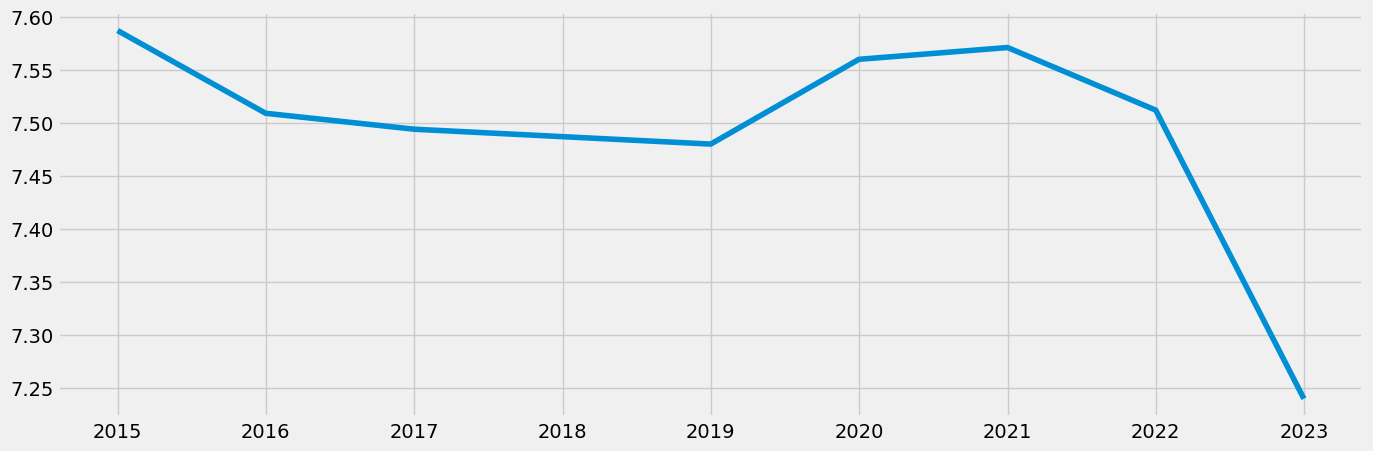

In [67]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_swl)

# Time Series Analysis: Decomposition 

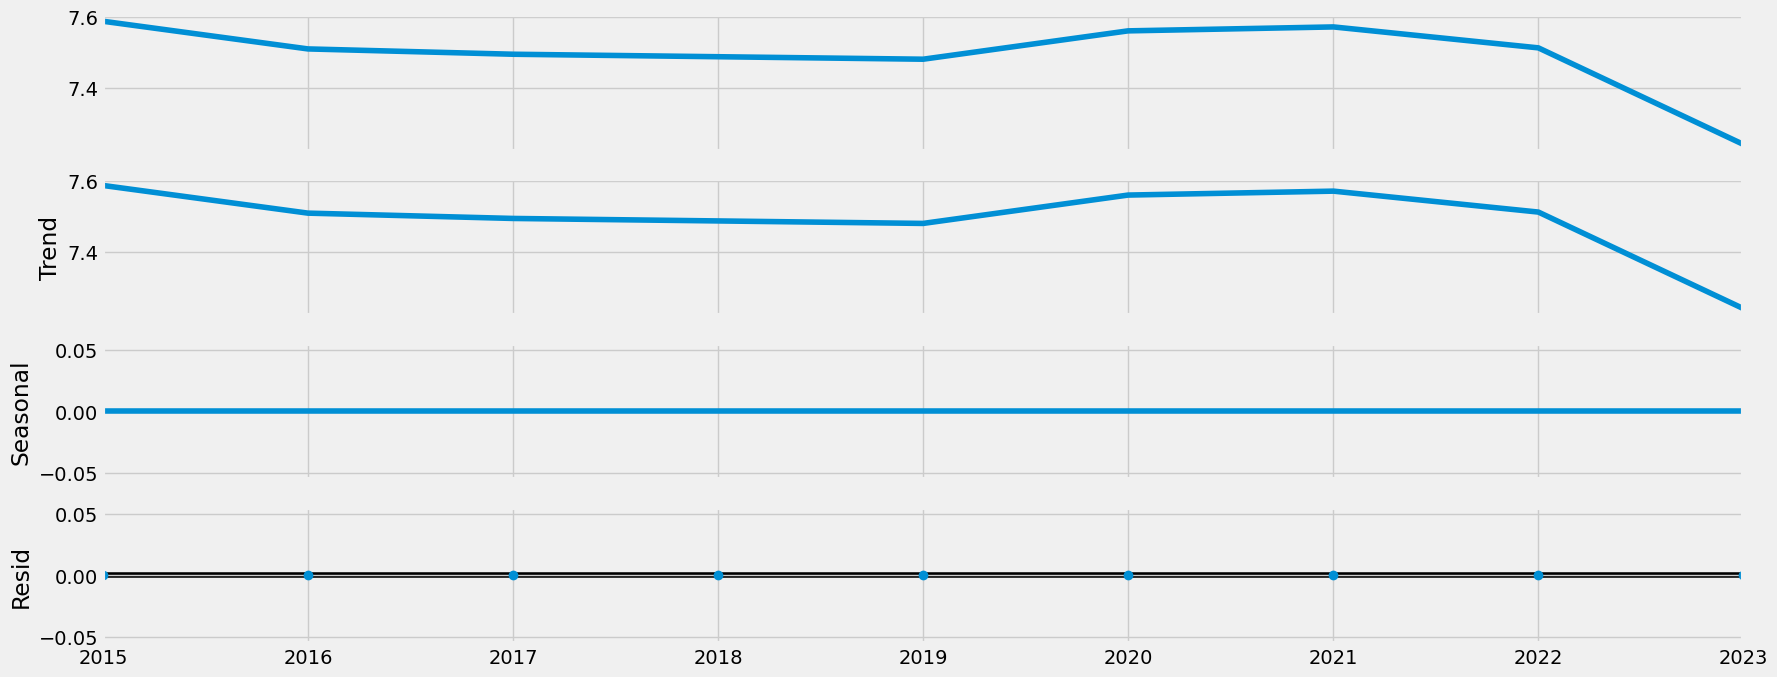

In [68]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_swl, model='additive')

from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
decomposition.plot()
plt.show()

# Testing for stationarity

In [70]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_swl['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.156149
p-value                        0.692169
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


#### Critical Value at 5% or 10% is smaller than the test Stastistic. With a signifcation level of 31%, we cannot reject the null Hypothesis and can conclude that the data is not stationary

# Checking for autocorrelations 

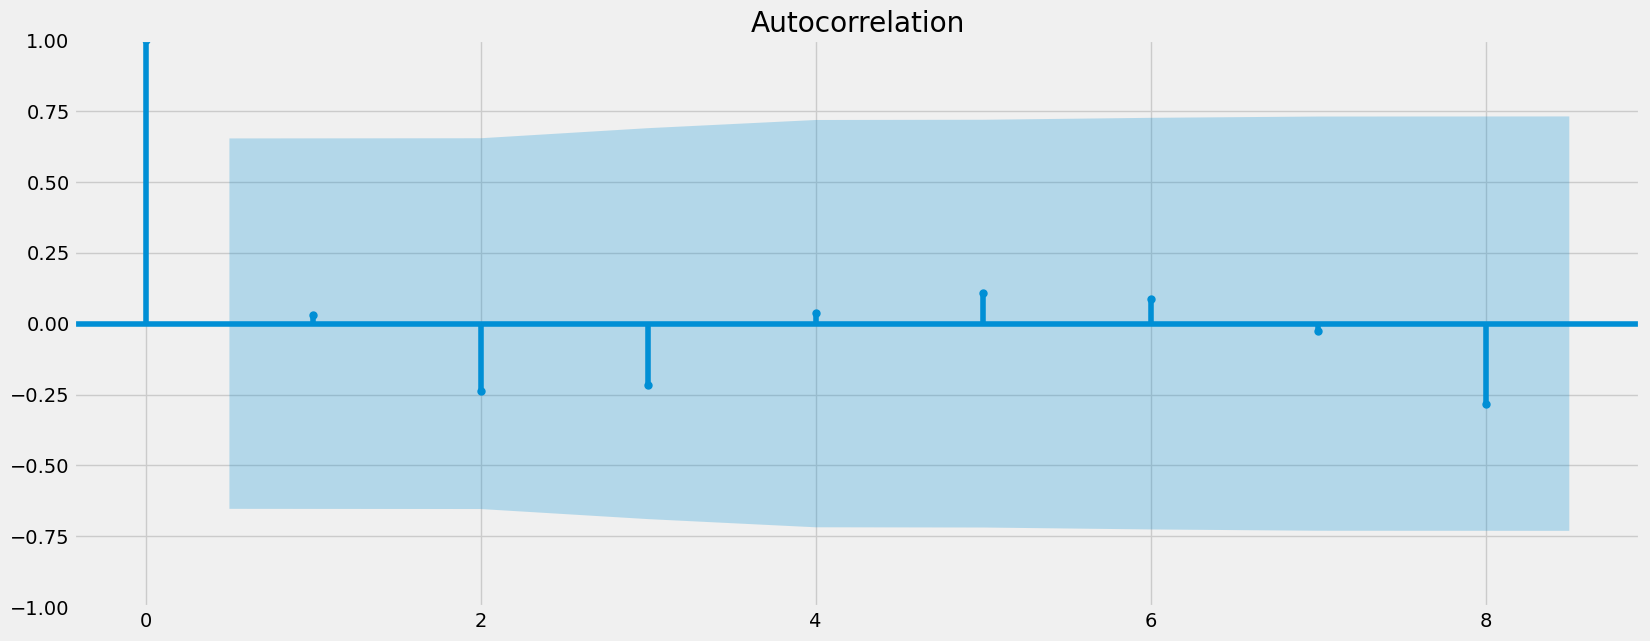

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_swl)
plt.show()

#### There is no lag in the data and would suggest that the data is stationary. but our Dickey-Fuller test concluded that this is non stationary. This might be because of lack of data

# Stationarizing the data 

In [72]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data_swl - data_swl.shift(1) 

# Here, we remove the missing values that came about as a result of the differencing. 
data_diff.dropna(inplace = True) 

In [73]:
data_diff.head()

,happiness_score
year,
2016-01-01,-0.0780
2017-01-01,-0.0150
2018-01-01,-0.0070
2019-01-01,-0.0070
2020-01-01,0.0799


In [74]:
data_diff.columns

Index(['happiness_score'], dtype='object')

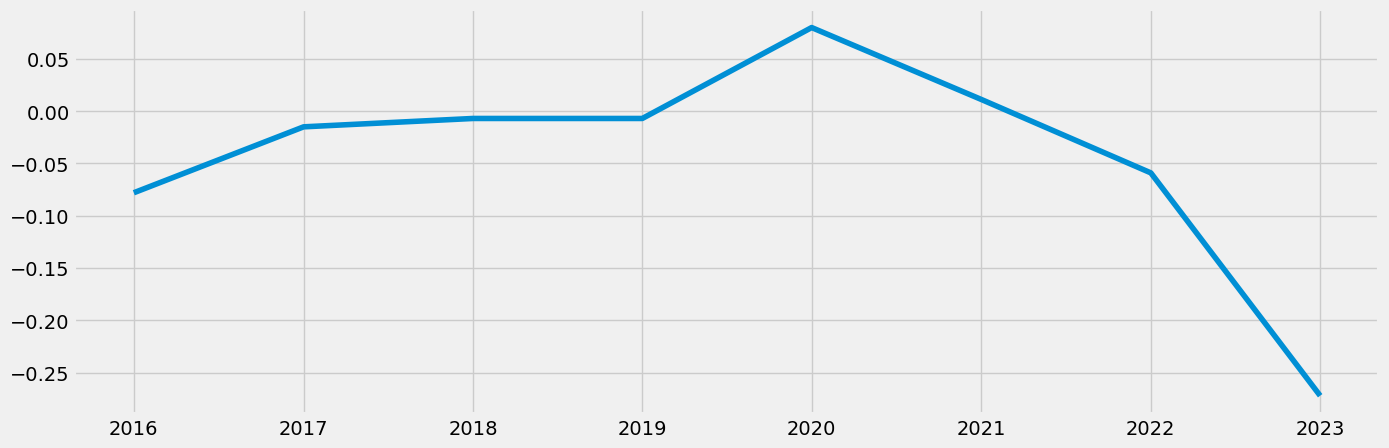

In [75]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [76]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.103537
p-value                        0.949085
Number of Lags Used            0.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


#### The critical value is smaller than the Test Statistic and we cannot reject the null Hypothesis 

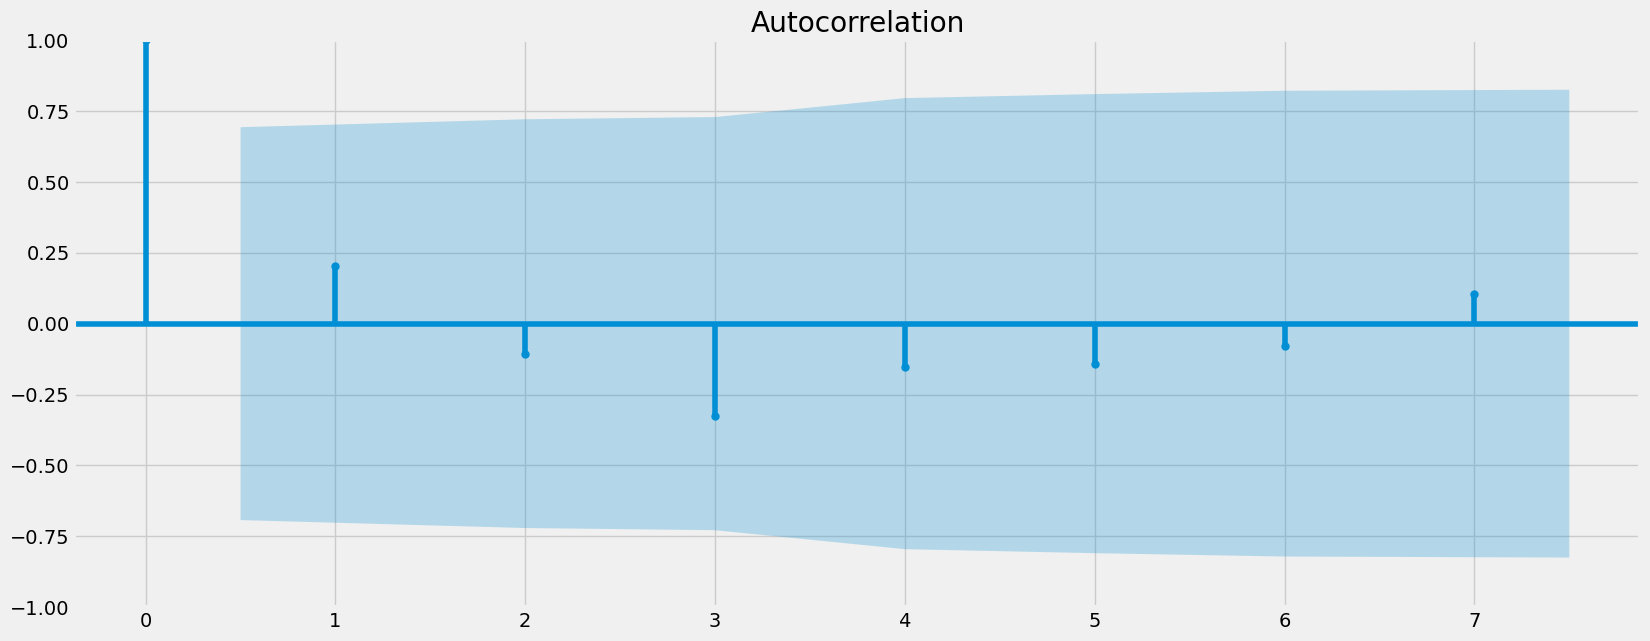

In [77]:
plot_acf(data_diff)
plt.show()

#### Overall there is not enough data to conduct Time series Analysis 